In [669]:
# Python library imports: numpy, random, sklearn, pandas, etc

import warnings
warnings.filterwarnings('ignore')

import sys
import random
import numpy as np

from sklearn import linear_model, cross_validation, metrics, svm
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



In [670]:
# function to read HDFS file into dataframe using PyDoop
import pydoop.hdfs as hdfs
def read_csv_from_hdfs( path ):
  pieces = []
  fhandle = hdfs.open(path)
  print "validating file : %s" % fhandle
  cols = ['key', 'value'];
  pieces.append(pd.read_csv(fhandle, names=cols, dtype=None, delimiter="\t"))
  fhandle.close()
  return pd.concat(pieces, ignore_index=True)

In [671]:
def extract_data_as_frame(in_data ):
    # dataset LONGITUDE  LATITUDE  T_DAILY_MEAN  SUR_TEMP_DAILY_AVG  SOIL_MOISTURE_10_DAILY
    data_list = []
    for index in data_val2:
        dict1 = {}
        x= float(index[3])  
        if x < -30:
            continue
        x= float(index[2])  
        if x < -30:
            continue
        dict1.update(lat=index[1],lon=index[0], day=float(index[2]), surface=float(index[3]), moisture=float(index[4])) 
        data_list.append(dict1)
    data_as_frame = pd.DataFrame(data_list, columns=['lat', 'lon', 'day', 'surface', 'moisture'])
    return data_as_frame

In [672]:
def extract_geo_data(in_data ):
    geo_list = []
    for index in data_val2:
        dict1 = {}
        dict1.update(lat=index[1],lon=index[0]) 
        geo_list.append(dict1)
    geo_key = pd.DataFrame(geo_list, columns=['lat', 'lon'])
    return geo_key

In [673]:
def extract_temp_data(in_data ):
    temp_list = []
    for index in data_val2:
        dict1 = {}
        dict1.update(day=index[2],surface=index[3]) 
        temp_list.append(dict1)
    temp_values = pd.DataFrame(temp_list, columns=['day', 'surface'])
    return temp_values

In [674]:
def extract_soil_mositure(in_data ):
    moisture_list = []
    for index in data_val2:
        dict1 = {}
        dict1.update(moisture=index[4] ) 
        moisture_list.append(dict1)
    moisture_values = pd.DataFrame(moisture_list, columns=['moisture'])
    return moisture_values

validating file : <pydoop.hdfs.file.hdfs_file object at 0x247fc6d0>


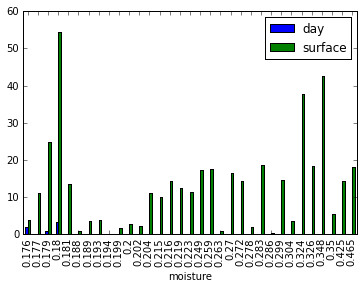

In [675]:
result = read_csv_from_hdfs('/user/cloudera/sci_data_1_out.txt/part-r-00000')
data_val =  result.iloc[:,[1]]
# data_val2 will be a series so we convert it to useful dataframes 
# dataset LONGITUDE  LATITUDE  T_DAILY_MEAN  SUR_TEMP_DAILY_AVG  SOIL_MOISTURE_10_DAILY
data_val2 = data_val.value.str.split('|')
data_as_frame =extract_data_as_frame(data_val2 )
len(data_as_frame) 
bymoisture = data_as_frame.head(40).groupby(['moisture']).mean() 
bymoisture[:2].plot(kind='bar')